In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

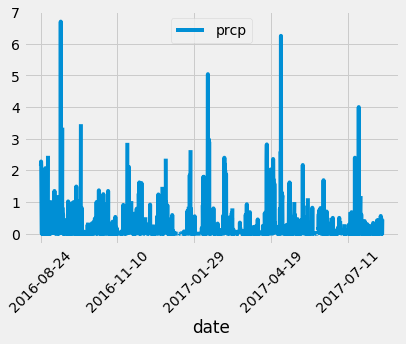

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
last_date = last_date[0]
first_date = dt.datetime.strptime(last_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
p_df = pd.DataFrame(query,columns=['date', 'prcp'])

# Sort the dataframe by date
p_df = p_df.sort_values(by='date',ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
p_df.plot('date', 'prcp')
plt.legend(loc='upper center')
plt.xticks(rotation=45)
plt.savefig("Images/Precipitation.png")
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
p_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [12]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement.station).distinct().count()
print(f"Stations Available: {stations} ")

Stations Available: 9 


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stations1 = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations: {stations1}")

station2=stations1[0][0]
print(f"Most Active Station: {station2}")

Most Active Stations: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
Most Active Station: USC00519281


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == station2).all()
print(f"Most active station: {station2}")
print(f"Low: {temp[0][0]} High: {temp[0][1]} Average: {round(temp[0][2], 1)}")

Most active station: USC00519281
Low: 54.0 High: 85.0 Average: 71.7


In [24]:
# Choose the station with the highest number of temperature observations.
station2

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs1 = session.query(Measurement.tobs).filter(Measurement.date >= first_date.filter(Measurement.station == station2).all()
tobs1 = pd.DataFrame(temperature_observations, columns=['temperature'])


SyntaxError: invalid syntax (<ipython-input-24-09a3a8200c5c>, line 6)